Number of benign images: 1938
Number of malignant images: 4913


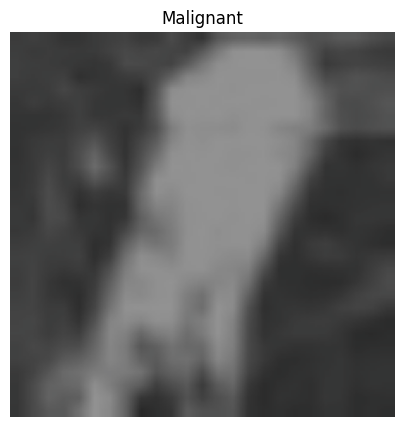

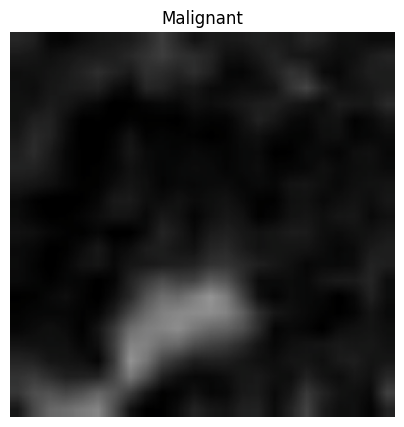

In [7]:
import torch
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
from collections import Counter

# Transformations for test and validation data with augmentation
test_transform = transforms.Compose([
    transforms.Resize((224, 224)),              # Resize all images to 224x224
    transforms.RandomCrop(224),
    transforms.RandomHorizontalFlip(),          # Randomly flip the image horizontally
    transforms.RandomVerticalFlip(),            # Randomly flip the image vertically
    transforms.ColorJitter(brightness=0.4, contrast=0.4, saturation=0.4, hue=0.2),  # Random color jitter
    transforms.ToTensor(),                      # Convert the image to a tensor
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])  # Normalize using ImageNet stats
])

# Load the test dataset
test_dataset = datasets.ImageFolder('D:\\Infosys Internship\\test', transform=test_transform)

# Create DataLoader for the test dataset
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=True)

# Count number of images in each class in the test dataset
class_counts = Counter([label for _, label in test_dataset])
print(f"Number of benign images: {class_counts[0]}")
print(f"Number of malignant images: {class_counts[1]}")

# Display two images from the test dataset
labels_map = {0: "Benign", 1: "Malignant"}  # Mapping for labels
images_shown = 0  # Counter to show 2 images

for images, labels in test_loader:
    for i in range(2):  # Display 2 images
        img = images[i].permute(1, 2, 0).numpy()  # Convert tensor to numpy for displaying
        img = img * [0.229, 0.224, 0.225] + [0.485, 0.456, 0.406]  # Unnormalize the image for visualization
        img = img.clip(0, 1)  # Clip values to be between 0 and 1

        plt.figure(figsize=(5, 5))
        plt.imshow(img)
        plt.title(f'{labels_map[labels[i].item()]}')  # Display 'Benign' or 'Malignant'
        plt.axis('off')
        plt.show()

        images_shown += 1
        if images_shown >= 2:
            break
    if images_shown >= 2:
        break


In [1]:
import torch
import torchvision.models as models

# Load the pre-trained VGG16 model
model = models.vgg16(pretrained=True)

# Set the model to evaluation mode
model.eval()

# To view the model architecture
print(model)


c:\Users\thesu\AppData\Local\Programs\Python\Python312\Lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
c:\Users\thesu\AppData\Local\Programs\Python\Python312\Lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG16_Weights.IMAGENET1K_V1`. You can also use `weights=VGG16_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/vgg16-397923af.pth" to C:\Users\thesu/.cache\torch\hub\checkpoints\vgg16-397923af.pth
100%|██████████| 528M/528M [01:34<00:00, 5.88MB/s] 


VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1